<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PRI  (Principio de relevancia de informacion)**

En esta seccion se derrolla el metodo del PRI con las siguientes metodologias, teniendo en cuenta la formula del PRI que está determinada por:
\
$$ L[p(X|X_{o})]= H_{2}(X)+\lambda D_{cs}(X,X_{o}) $$
\
minimizando $L$ respecto $X$ se tiene:\
\
$$ J(X)=min_{x}[H_{2}(X)+ \lambda (2H_{2}(X,X_{o})-H_{2}(X)-H(X_{o}))]$$
\
dado que $H_{2}(X_{o})$ es constante se tiene  
\
$$ J(X)=min_{x}[(1-\lambda)H_{2}(X)+2\lambda H_{2}(X,X_{o})]$$ 
\
Antes de realizar la minimizacion se analizan los posibles valores de $\lambda$ siendo de interes el rango comprendido para $1<\lambda<\infty$ , por tanto, se procede con la minimizacion dependiendo de los siguientes casos
\
$$J(X)=-(1-\lambda)log(V(X))-2\lambda log(V(X,X_{o}))$$
\
Donde $V(X)$ y $V(X,X_{o})$ estan definidos como:
\
$$V(X)=\frac{1}{N^{2}}\sum_{i=1}^{N}\sum_{j=1}^{N}G_{\sigma}(x_{i}-x_{j} )$$
\
$$V(X,X_{o})=\frac{1}{NN_{o}}\sum_{i=1}^{N}\sum_{j=1}^{N_{o}}G_{\sigma}(x_{i}-x_{oj})$$
\
Por tanto, al minimizar $J(X)$ respecto a $x$ se tiene:

$$ J(X)= min_{x}[-(1-\lambda)\log(V(X))-2\lambda\log(V(X,X_{o}))]$$
\
$$\frac{d J(X)}{dx_{k}}=\frac{2(1-\lambda)}{V(X)}F(x_{k})+\frac{2\lambda }{V(X,X_{o})}F(x,X_{o})=0$$
\
$$\frac{d J(X)}{dx_{k}}=\frac{2N(1-\lambda)}{ \sigma^{2}}\frac{\sum_{j=1}^{N}G_{\sigma}(x_{k}-x_{j})(x_{k}-x_{j})}{\sum_{i=1}^{N}\sum_{j=1}^{N}G_{\sigma}(x_{i}-x_{j} )}+\frac{2\lambda N}{\sigma^{2}}\frac{\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})(x_{k}-x_{oj})}{\sum_{i=1}^{N}\sum_{j=1}^{N}G_{\sigma}(x_{i}-x_{oj} )}$$
\
\
$$X\in R^{N'\times D}, donde [x_{i},x_{j}\in R^{D}(i,j):1,..,N'] $$
\
$$X_{o}\in R^{N\times D}, donde [x_{i},x_{j}\in R^{D}(i,j):1,..,N] $$
\
$$K=k(x_{i},x_{j})\in R^{N'\times N'} $$
\
$$K_{o}=k(x_{i},x_{oj})\in R^{N\times N'} $$
\
$$c=\frac{2N}{ \sigma^{2}}$$
\
$$\textbf{1}'\in R^{N'}$$
\
$$\textbf{1}\in R^{N}$$
\
$$I_{m}'\in R^{N'\times D};I_{i,..,D}=1\forall i,j=1,..,N'$$
\
$$I_{m}\in R^{N\times D};I_{i,..,D}=1\forall i=1,..,N$$
\
$$\frac{d J(X)}{dx_{k}}=c(1-\lambda)\frac{KX-KI_{m}'*X}{\textbf{1}'K(\textbf{1}')^{T}}+c\lambda \frac{K_{o}X_{o}-K_{o}I_{m}*X}{\textbf{1}K_{o}(\textbf{1}')^{T}}$$
\
Donde $F(x_{k})$ y $F(x,X_{o})$ estan definidos como:
\
$$F(x_{k})=\frac{-1}{N \sigma^{2}}\sum_{j=1}^{N}G_{\sigma}(x_{k}-x_{j})(x_{k}-x_{j})$$ 
$$F(x;X_{o})=\frac{-1}{N_{o} \sigma^{2}}\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})(x_{k}-x_{oj})$$ 

1.   FP (punto Fijo)
\
Para esta metodologia se despeja la derivada en terminos de $x_{k}$, dando como resultado:
$$\frac{(1-\lambda)}{NV(X)}\sum_{j=1}^{N}G_{\sigma}(x_{k}-x_{j})(x_{j}-x_{k})=\frac{\lambda}{N_{o}V(X,X_{o})}\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})(x_{k}-x_{oj})$$
\
$$x_{k}(n+1)=c\frac{(1-\lambda)}{\lambda}\frac{\sum_{j=1}^{N}G_{\sigma}(x_{k}-x_{j})x_{j}}{\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})}+\frac{\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})x_{oj}}{\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})}-c\frac{(1-\lambda)}{\lambda}\frac{\sum_{j=1}^{N}G_{\sigma}(x_{k}-x_{j})x_{k}}{\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})}$$
\
Donde el parametro $c$ corresponde a:
\
\
$c=\frac{N_{o}V(X,X_{o})}{NV(X)}$ 

2.   SGD (Gradiente descendiente estocastico)
\
Para esta metogologia el calculo de $x_{k+1}$ esta dado por:
\
$$x_{k+1}=x_{k}-\gamma \frac{d J(X)}{dx_{k}}$$
\
$$X_{k+1}=X_{k}-\gamma(c(1-\lambda)\frac{KX-KI_{m}'*X}{\textbf{1}'K(\textbf{1}')^{T}}+c\lambda \frac{K_{o}X_{o}-K_{o}I_{m}*X}{\textbf{1}K_{o}(\textbf{1}')^{T}})$$
3.   SGD por mini lotes
\
Para esta metogologia el calculo de $x_{k+1}$ esta dado por:
\
$$x_{k+1}=x_{k}-\gamma \frac{d J(X)}{dx_{k}}$$
\
Donde bs hace referencia al tamaño del lote, la presente metodologia está expresada como:
\
$$J(X)=\frac{1}{bs} \sum_{z=0}^{bs} c(1-\lambda)\frac{KX-KI_{m}'*X}{\textbf{1}'K(\textbf{1}')^{T}}+c\lambda \frac{K_{o}X_{o}^{z}-K_{o}I_{m}*X}{\textbf{1}K_{o}(\textbf{1}')^{T}})$$
\
$$x_{k+1}=x_{k}-\gamma(J(X))$$

**Recomendación antes de iniciar**

**Prevenir ser desconectado de Google colab**\
Es un problema comun pero facil de corregir, para eso es necesario seguir los siguientes pasos
1. Presionar la secuencia Crtl+Shift+i, a continuacion se desplegara una ventana adyacente, en dicha ventana buscar y posteriormente hacer click en la seccion Consola o Console.
2. Una vez alli, en la parte final de la ventana podrá observar un cuadro de texto por favor introducir el siguiente codigo:
\

```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000) 
```
3. Presione posteriormente Enter, luego deberá observar un mensaje que dice "working", en caso de un error introducir el siguiente codigo:
\

```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button").click() 
}setInterval(ClickConnect,60000)
```


**Cargar funciones desde un .ZIP**

In [1]:
#https://drive.google.com/file/d/1_7TT83TiGF1Dnr--2iAfJqNj_Q3se_AL/view?usp=sharing
#https://drive.google.com/open?id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
#id del archivo: 1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
FILEID = "1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2020-05-04 20:01:10--  https://docs.google.com/uc?export=download&confirm=&id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
Resolving docs.google.com (docs.google.com)... 64.233.182.102, 64.233.182.138, 64.233.182.101, ...
Connecting to docs.google.com (docs.google.com)|64.233.182.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-8k-docs.googleusercontent.com/docs/securesc/pb1haitur7ht7outa1h4cme775peo76b/jeoqf9asbfpk5dbp330abr89j2i39005/1588622400000/11146100322577758036/12137606559606960138Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download [following]
--2020-05-04 20:01:11--  https://doc-0k-8k-docs.googleusercontent.com/docs/securesc/pb1haitur7ht7outa1h4cme775peo76b/jeoqf9asbfpk5dbp330abr89j2i39005/1588622400000/11146100322577758036/12137606559606960138Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download
Resolving doc-0k-8k-docs.googleusercontent.com (doc-0k-8k-docs.googleusercontent.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connecting to

**Añadir carpeta**

In [0]:
import os
import sys
Path='/content/PRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

**Cargar librerias**

In [0]:
import cv2
import time
import shutil
import numpy as np
import math as math
import scipy.io as sio
from sklearn import datasets
from joblib import dump,load
from main_functions import *
from google.colab import files
import matplotlib.pyplot as plt
from scipy.spatial import distance
from datetime import date, datetime
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.base import BaseEstimator, TransformerMixin, ClusterMixin

**Cargar Bases de datos**

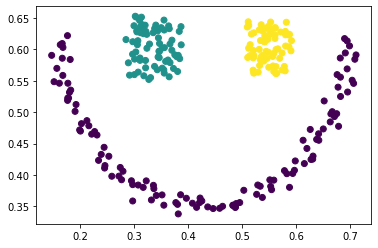

In [4]:
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
plt.scatter(happy[:,0],happy[:,1],c=labels_happy)

**Parte 1**

**Punto Fijo**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    happy, labels_happy, test_size=0.2, stratify=labels_happy)


**Sin reduccion**

el tiempo requerido fue:4.983315706253052sg


/content/PRI/main_functions.py:195: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


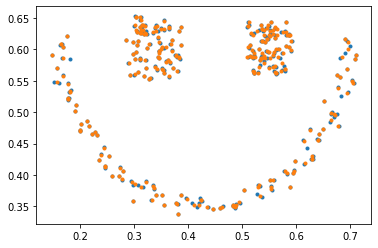

In [75]:
t = time.time()
p = PRI(lambda_=15, n_clusters=3, nn=3, sigma_initial=10)
p.fit(happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(happy[:, 0], happy[:, 1], marker='.')
plt.scatter(p.cluster_centers_[:, 0], p.cluster_centers_[:, 1], marker='.')

**Con reduccion**

/content/PRI/main_functions.py:195: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:195: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


el tiempo requerido fue:3.3665223121643066sg
Ari: 0.41093887101491666 y accuracy: 0.7592592592592593


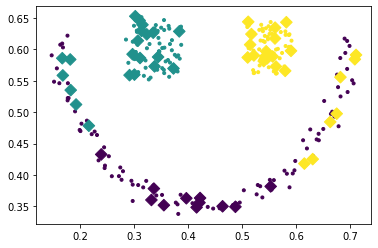

In [79]:
t = time.time()
p = PRI(lambda_=10, n_clusters=3, nn=5, sigma_initial=10,reduction_=True)
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))


**SGD**

**Sin reduccion**

el tiempo requerido fue:4.418113946914673sg


/content/PRI/main_functions.py:500: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


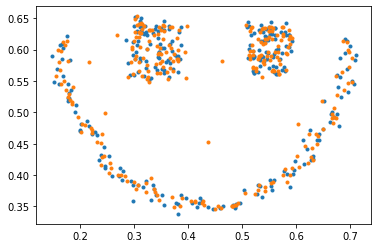

In [53]:
t = time.time()
p = MiniBatchPRI(lambda_=45,sigma_initial=40,learning_rate=9, decay=0.001)
p.fit(happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(happy[:, 0], happy[:, 1], marker='.')
plt.scatter(p.cluster_centers_[:, 0], p.cluster_centers_[:, 1], marker='.')

**Con reduccion**

el tiempo requerido fue:2.9283151626586914sg
Ari: 0.3445901357128511 y accuracy: 0.7037037037037037


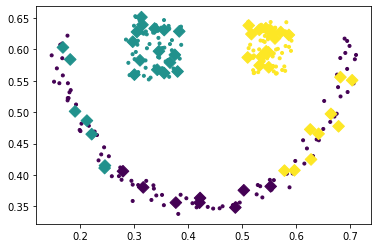

In [54]:
t = time.time()
p = MiniBatchPRI(lambda_=45, n_clusters=3, nn=3, sigma_initial=40,reduction_=True,learning_rate=9, decay=0.001)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Adam**

**Con reduccion**

el tiempo requerido fue:4.61424994468689sg


/content/PRI/main_functions.py:500: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


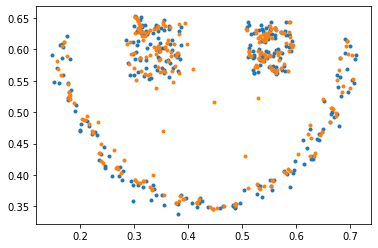

In [61]:
t = time.time()
p = MiniBatchPRI(lambda_=15,sigma_initial=40,learning_rate=0.002,optimization='Adam')
p.fit(happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(happy[:, 0], happy[:, 1], marker='.')
plt.scatter(p.cluster_centers_[:, 0], p.cluster_centers_[:, 1], marker='.')

**Sin reduccion**

el tiempo requerido fue:2.9468135833740234sg
Ari: 0.38485033598045204 y accuracy: 0.7407407407407407


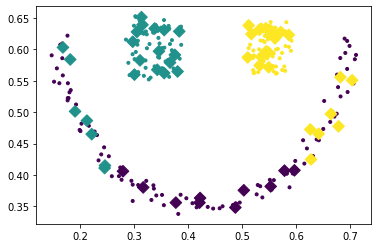

In [63]:
t = time.time()
p = MiniBatchPRI(lambda_=15, n_clusters=3, nn=3, sigma_initial=40,learning_rate=0.002,optimization='Adam',reduction_=True)
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D',s=68)
Rari_SGDA=adjusted_rand_score(y_test,labels_pre_SGDA)
Racc_SGDA=accuracy_score(y_test,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))

**Nadam**

**Sin reduccion**

el tiempo requerido fue:4.612104177474976sg


/content/PRI/main_functions.py:500: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


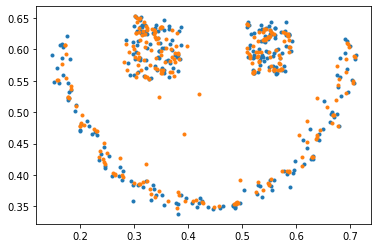

In [65]:
t = time.time()
p = MiniBatchPRI(lambda_=15,sigma_initial=40,learning_rate=0.002,optimization='Nadam')
p.fit(happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(happy[:, 0], happy[:, 1], marker='.')
plt.scatter(p.cluster_centers_[:, 0], p.cluster_centers_[:, 1], marker='.')

**Con reduccion**

el tiempo requerido fue:2.9609615802764893sg
Ari: 0.37377521613832854 y accuracy: 0.7222222222222222


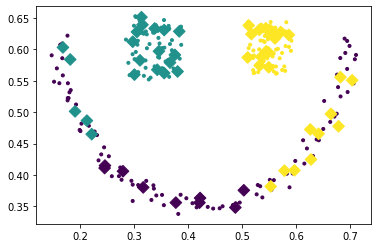

In [66]:
t = time.time()
p = MiniBatchPRI(lambda_=3, n_clusters=3, nn=3, sigma_initial=40,learning_rate=0.002,optimization='Nadam',reduction_=True)
p.fit(X_train, y_train)
labels_pre_SGDN = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDN, marker='D',s=68)
Rari_SGDN=adjusted_rand_score(y_test,labels_pre_SGDN)
Racc_SGDN=accuracy_score(y_test,labels_pre_SGDN)
print('Ari: '+str(Rari_SGDN)+' y'+' accuracy: '+str(Racc_SGDN))

**KNN**

el tiempo requerido fue:0.05641913414001465sg
Ari: 0.3445901357128511 y accuracy: 0.7037037037037037


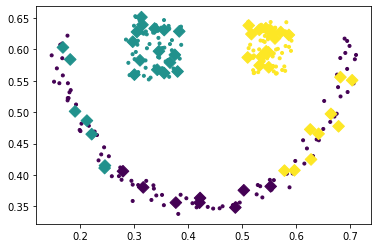

In [67]:
t = time.time()
p = Kmeans( n_clusters_=3)
p.fit(X_train, y_train)
labels_pre_Km= p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_Km, marker='D',s=68)
Rari_Km=adjusted_rand_score(y_test,labels_pre_Km)
Racc_Km=accuracy_score(y_test,labels_pre_Km)
print('Ari: '+str(Rari_Km)+' y'+' accuracy: '+str(Racc_Km))


**Spectral CLustering**

el tiempo requerido fue:0.05910325050354004sg
Ari: 1.0 y accuracy: 1.0


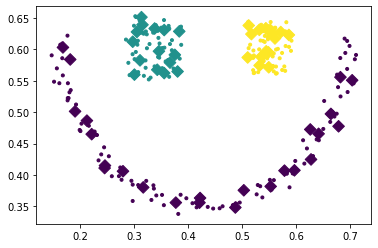

In [68]:
t = time.time()
p = SC(n_clusters_=3, gamma_=500, n_neighbors_=5, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))


**Con ruido**

**Happy**

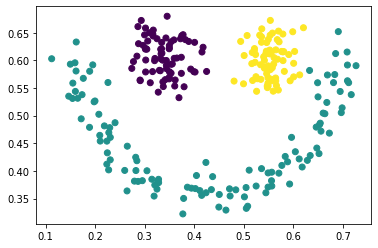

In [0]:
noise = np.random.normal(0,1,happy.shape)
noisy_happy=happy+noise*0.02
plt.scatter(noisy_happy[:,0],noisy_happy[:,1],c=labels_happy)

**Moons**

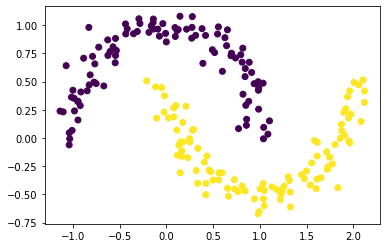

In [0]:
from sklearn import  datasets
noisy_moons,labels_moons = datasets.make_moons(n_samples=200, noise=.085)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=labels_moons)

**Resultados**

**Happy**

In [0]:
n_clusters=3
steps =[[('rep',SC())],
        [('rep',Kmeans())], 
        [('rep', PRI())], 
         [('rep', MiniBatchPRI())], 
         [('rep', MiniBatchPRI())], 
          [('rep',  MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[10,100,200,500,1000],'rep__n_neighbors_':[5,10,15],'rep__nn_':[3,5,9],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[3,5,9],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[10, 15, 30, 50],
             'rep__sigma_initial':[10,20,40,50],
             'rep__nn':[3,5,9],'rep__n_clusters':[n_clusters],'rep__reduction_':[True]},
             {'rep__lambda_':[10, 15, 30, 50],
             'rep__sigma_initial':[10,20,40,50],
             'rep__nn':[3,5,9],'rep__n_clusters':[n_clusters],'rep__reduction_':[True]},
             {'rep__lambda_':[10, 15, 30, 50],
             'rep__sigma_initial':[10,20,40,50],
             'rep__nn':[3,5,9],'rep__n_clusters':[n_clusters],'rep__reduction_':[True],'rep__optimization':['Adam']},
             {'rep__lambda_':[10, 15, 30, 50],
             'rep__sigma_initial':[10,20,40,50],
             'rep__nn':[3,5,9],'rep__n_clusters':[n_clusters],'rep__reduction_':[True],'rep__optimization':['Nadam']}]

In [0]:
#valildacion cruzada anidada
for i in range(len(steps)):
  meth_name = ['sc', 'Knn', 'FP','SGD','SGDA','SGDN']
  name='/content/PRI/happy' + str(meth_name[i]) + '.joblib'
  Niter = 10 #numero particiones
  acc =np.zeros(Niter)#arreglo para guardar acierto
  ari=np.zeros(Niter)
  Nc = len(np.unique(labels_happy))
  cmc = np.zeros((Niter,Nc,Nc))#arreglo para guarda matrices de confusion
  best_estimators= []#mejor metodo por iteracion
  best_parameters= []#mejor metodo por iteracion

  for j in range(Niter):
          print('it %d/%d'%(j+1,Niter))
          ## Accuracy
          X_train, X_test, y_train, y_test = train_test_split(happy,labels_happy,test_size=0.2, stratify=labels_happy)
          grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=-1)
          #generar mejor modelo
          grid_search.fit(X_train,y_train)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_test)
          #guardar mejor modelo
          best_estimators.append(grid_search.best_estimator_)
          best_parameters.append(grid_search.best_params_)
          
          #guardar acierto
          acc[j] = 100*accuracy_score(y_test,y_pred)
          ari[j]=100*adjusted_rand_score(y_test,y_pred)
          #estimar matriz de confusion
          cm = confusion_matrix(y_test, y_pred)
          cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cmc[j] = cm
          print('it %d/%d'%(j+1,Niter))
          print(grid_search.best_params_)
          print('acc:',acc[j])
          print('ari:',ari[j])
          print('confusionmatrix \n',cmc[j])
          savedata = {
              'ari':ari,
              'acc':acc,
              'confusionmatrix':cmc,
              'best_models':best_estimators,
              'best_parameters':best_parameters,
                } 
          dump(savedata,name)

it 1/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    8.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 2/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 3/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 4/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 5/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 6/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 222 out of 225 | elapsed:    9.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    9.4s finished


it 6/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 7/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 222 out of 225 | elapsed:    9.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 8/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 9/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 10/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 70.37037037037037
ari: 34.459013571285105
confusionmatrix 
 [[ 33.33333333  29.16666667  37.5       ]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 74.07407407407408
ari: 38.485033598045206
confusionmatrix 
 [[ 41.66666667  29.16666667  29.16666667]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 74.07407407407408
ari: 39.22194803309624
confusionmatrix 
 [[ 41.66666667  20.83333333  37.5       ]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 68.51851851851852
ari: 32.670616383730206
confusionmatrix 
 [[ 29.16666667  33.33333333  37.5       ]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 74.07407407407408
ari: 38.66953538407862
confusionmatrix 
 [[ 41.66666667  25.          33.33333333]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 66.66666666666666
ari: 31.27383676582761
confusionmatrix 
 [[ 25.   37.5  37.5]
 [  0.  100.    0. ]
 [  0.    0.  100. ]]
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 70.37037037037037
ari: 34.27488804684808
confusionmatrix 
 [[ 33.33333333  33.33333333  33.33333333]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 70.37037037037037
ari: 35.01031400412561
confusionmatrix 
 [[ 33.33333333  41.66666667  25.        ]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 75.92592592592592
ari: 41.462131837307155
confusionmatrix 
 [[ 45.83333333  33.33333333  20.83333333]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 72.22222222222221
ari: 38.4748002988334
confusionmatrix 
 [[ 37.5         16.66666667  45.83333333]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 1/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 1/10
{'rep__lambda_': 15, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': True, 'rep__sigma_initial': 20}
acc: 74.07407407407408
ari: 45.93083573487032
confusionmatrix 
 [[ 45.83333333   0.          54.16666667]
 [  0.         100.           0.        ]
 [  0.           6.66666667  93.33333333]]
it 2/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.3min finished


it 2/10
{'rep__lambda_': 10, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__reduction_': True, 'rep__sigma_initial': 40}
acc: 77.77777777777779
ari: 45.56228601527522
confusionmatrix 
 [[ 50.   12.5  37.5]
 [  0.  100.    0. ]
 [  0.    0.  100. ]]
it 3/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.3min finished


it 3/10
{'rep__lambda_': 15, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': True, 'rep__sigma_initial': 40}
acc: 81.48148148148148
ari: 51.28129341175776
confusionmatrix 
 [[ 58.33333333  12.5         29.16666667]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 4/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.3min finished


it 4/10
{'rep__lambda_': 15, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__reduction_': True, 'rep__sigma_initial': 50}
acc: 72.22222222222221
ari: 38.4748002988334
confusionmatrix 
 [[ 37.5         45.83333333  16.66666667]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 5/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 5/10
{'rep__lambda_': 30, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': True, 'rep__sigma_initial': 40}
acc: 74.07407407407408
ari: 45.01414730343823
confusionmatrix 
 [[ 41.66666667   4.16666667  54.16666667]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 6/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 6/10
{'rep__lambda_': 30, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__reduction_': True, 'rep__sigma_initial': 40}
acc: 75.92592592592592
ari: 46.54178674351585
confusionmatrix 
 [[ 45.83333333   4.16666667  50.        ]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 7/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.3min finished


it 7/10
{'rep__lambda_': 10, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': True, 'rep__sigma_initial': 20}
acc: 81.48148148148148
ari: 51.28129341175776
confusionmatrix 
 [[ 58.33333333  29.16666667  12.5       ]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 8/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 8/10
{'rep__lambda_': 30, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': True, 'rep__sigma_initial': 20}
acc: 81.48148148148148
ari: 55.04533489324365
confusionmatrix 
 [[ 58.33333333  41.66666667   0.        ]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 9/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 9/10
{'rep__lambda_': 10, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__reduction_': True, 'rep__sigma_initial': 20}
acc: 68.51851851851852
ari: 36.30670277589709
confusionmatrix 
 [[ 29.16666667  54.16666667  16.66666667]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 10/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 10/10
{'rep__lambda_': 50, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': True, 'rep__sigma_initial': 20}
acc: 66.66666666666666
ari: 42.620254899273675
confusionmatrix 
 [[ 25.           4.16666667  70.83333333]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 1/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.5min finished
/content/PRI/main_functions.py:500: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__lambda_': 50, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': True, 'rep__sigma_initial': 20}
acc: 72.22222222222221
ari: 39.927872230808866
confusionmatrix 
 [[ 37.5  50.   12.5]
 [  0.  100.    0. ]
 [  0.    0.  100. ]]
it 2/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.5min finished


it 2/10
{'rep__lambda_': 50, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__reduction_': True, 'rep__sigma_initial': 50}
acc: 72.22222222222221
ari: 62.192049643321226
confusionmatrix 
 [[100.           0.           0.        ]
 [ 13.33333333   0.          86.66666667]
 [  0.           0.         100.        ]]
it 3/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.5min finished
/content/PRI/main_functions.py:500: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__lambda_': 50, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 74.07407407407408
ari: 40.139009556907034
confusionmatrix 
 [[ 41.66666667  16.66666667  41.66666667]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 4/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.5min finished


it 4/10
{'rep__lambda_': 50, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': True, 'rep__sigma_initial': 40}
acc: 70.37037037037037
ari: 35.01031400412561
confusionmatrix 
 [[ 33.33333333  25.          41.66666667]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 5/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.5min finished
/content/PRI/main_functions.py:500: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__lambda_': 50, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': True, 'rep__sigma_initial': 20}
acc: 66.66666666666666
ari: 32.0033836176512
confusionmatrix 
 [[ 25.          45.83333333  29.16666667]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 6/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.5min finished


it 6/10
{'rep__lambda_': 10, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__reduction_': True, 'rep__sigma_initial': 40}
acc: 77.77777777777779
ari: 44.09906866057526
confusionmatrix 
 [[ 50.          29.16666667  20.83333333]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 7/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.5min finished


it 7/10
{'rep__lambda_': 10, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': True, 'rep__sigma_initial': 40}
acc: 68.51851851851852
ari: 38.09871413330338
confusionmatrix 
 [[ 29.16666667  12.5         58.33333333]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 8/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.6min finished
/content/PRI/main_functions.py:500: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__lambda_': 10, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': True, 'rep__sigma_initial': 20}
acc: 70.37037037037037
ari: 37.069215175209955
confusionmatrix 
 [[ 41.66666667  50.           8.33333333]
 [  0.          86.66666667  13.33333333]
 [  0.           0.         100.        ]]
it 9/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.5min finished


it 9/10
{'rep__lambda_': 50, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__reduction_': True, 'rep__sigma_initial': 50}
acc: 74.07407407407408
ari: 39.22194803309624
confusionmatrix 
 [[ 41.66666667  37.5         20.83333333]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 10/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.6min finished


it 10/10
{'rep__lambda_': 10, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': True, 'rep__sigma_initial': 40}
acc: 68.51851851851852
ari: 34.86067059356592
confusionmatrix 
 [[ 29.16666667  20.83333333  50.        ]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 1/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.5min finished
/content/PRI/main_functions.py:500: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__lambda_': 10, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__optimization': 'Adam', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 2/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.6min finished
/content/PRI/main_functions.py:500: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__lambda_': 30, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Adam', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 72.22222222222221
ari: 52.46636771300448
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [100.   0.   0.]]
it 3/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.5min finished
/content/PRI/main_functions.py:500: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__lambda_': 50, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__optimization': 'Adam', 'rep__reduction_': True, 'rep__sigma_initial': 20}
acc: 75.92592592592592
ari: 42.19643065438003
confusionmatrix 
 [[ 45.83333333  16.66666667  37.5       ]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 4/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.5min finished
/content/PRI/main_functions.py:500: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__lambda_': 50, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 92.5925925925926
ari: 77.9691211401425
confusionmatrix 
 [[ 83.33333333   0.          16.66666667]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 5/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.5min finished
/content/PRI/main_functions.py:500: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__lambda_': 50, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Adam', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 72.22222222222221
ari: 52.46636771300448
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [100.   0.   0.]]
it 6/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.6min finished
/content/PRI/main_functions.py:500: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__lambda_': 10, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__reduction_': True, 'rep__sigma_initial': 20}
acc: 79.62962962962963
ari: 47.49690429860251
confusionmatrix 
 [[ 54.16666667  29.16666667  16.66666667]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 7/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.6min finished


it 7/10
{'rep__lambda_': 30, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Adam', 'rep__reduction_': True, 'rep__sigma_initial': 50}
acc: 70.37037037037037
ari: 34.459013571285105
confusionmatrix 
 [[ 33.33333333  29.16666667  37.5       ]
 [  0.         100.           0.        ]
 [  0.           0.         100.        ]]
it 8/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.1s


**Moons**

In [0]:
n_clusters=3
steps =[[('rep',SC())],
        [('rep',Kmeans())], 
        [('rep', PRI())], 
         [('rep', MiniBatchPRI())], 
         [('rep', MiniBatchPRI())], 
          [('rep',  MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[10,100,200,500,1000],'rep__n_neighbors_':[5,10,15],'rep__nn_':[3,5,9],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[3,5,9],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9],'rep__n_clusters':[n_clusters],'rep__reduction_':[True],'rep__prediction':['Gaussian','Div']},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[10,15,25,40,50],
             'rep__nn':[3,5,9],'rep__n_clusters':[n_clusters],'rep__reduction_':[True],'rep__prediction':['Gaussian','Div']},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[10,15,25,40,50],
             'rep__nn':[3,5,9],'rep__n_clusters':[n_clusters],'rep__reduction_':[True],'rep__optimization':['Adam'],'rep__prediction':['Gaussian','Div']},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[10,15,25,40,50],
             'rep__nn':[3,5,9],'rep__n_clusters':[n_clusters],'rep__reduction_':[True],'rep__optimization':['Nadam'],'rep__prediction':['Gaussian','Div']}]

In [0]:
#valildacion cruzada anidada
for i in range(len(steps)):
  meth_name = ['sc', 'Knn', 'FP','SGD','SGDA','SGDN']
  name='/content/PRI/moons' + str(meth_name[i]) + '.joblib'
  Niter = 10 #numero particiones
  acc =np.zeros(Niter)#arreglo para guardar acierto
  ari=np.zeros(Niter)
  Nc = len(np.unique(labels_moons))
  cmc = np.zeros((Niter,Nc,Nc))#arreglo para guarda matrices de confusion
  best_estimators= []#mejor metodo por iteracion
  best_parameters= []#mejor metodo por iteracion

  for j in range(Niter):
          print('it %d/%d'%(j+1,Niter))
          ## Accuracy
          X_train, X_test, y_train, y_test = train_test_split(noisy_moons,labels_moons,test_size=0.2, stratify=labels_moons)
          grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=-1)
          #generar mejor modelo
          grid_search.fit(X_train,y_train)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_test)
          #guardar mejor modelo
          best_estimators.append(grid_search.best_estimator_)
          best_parameters.append(grid_search.best_params_)
          
          #guardar acierto
          acc[j] = 100*accuracy_score(y_test,y_pred)
          ari[j]=100*adjusted_rand_score(y_test,y_pred)
          #estimar matriz de confusion
          cm = confusion_matrix(y_test, y_pred)
          cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cmc[j] = cm
          print('it %d/%d'%(j+1,Niter))
          print(grid_search.best_params_)
          print('acc:',acc[j])
          print('ari:',ari[j])
          print('confusionmatrix \n',cmc[j])
          savedata = {
              'ari':ari,
              'acc':acc,
              'confusionmatrix':cmc,
              'best_models':best_estimators,
              'best_parameters':best_parameters,
                } 
          dump(savedata,name)

it 1/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  4.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 2/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  4.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 3/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  5.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 4/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  4.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 5/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  5.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 6/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  5.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 7/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  5.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 8/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  5.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 9/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  5.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 10/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  4.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 77.5
ari: 28.53201970443349
confusionmatrix 
 [[90. 10.]
 [35. 65.]]
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 77.5
ari: 28.793927099011846
confusionmatrix 
 [[100.   0.]
 [ 45.  55.]]
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 70.0
ari: 13.99317406143345
confusionmatrix 
 [[55. 45.]
 [15. 85.]]
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 70.0
ari: 13.99317406143345
confusionmatrix 
 [[55. 45.]
 [15. 85.]]
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 70.0
ari: 14.15094339622641
confusionmatrix 
 [[50. 50.]
 [10. 90.]]
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 77.5
ari: 28.644501278772378
confusionmatrix 
 [[95.  5.]
 [40. 60.]]
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 65.0
ari: 7.794232268121577
confusionmatrix 
 [[ 30.  70.]
 [  0. 100.]]
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 72.5
ari: 18.414322250639387
confusionmatrix 
 [[55. 45.]
 [10. 90.]]
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 72.5
ari: 18.585171127544008
confusionmatrix 
 [[95.  5.]
 [50. 50.]]
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 77.5
ari: 28.793927099011846
confusionmatrix 
 [[100.   0.]
 [ 45.  55.]]
it 1/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.3min finished


it 1/10
{'rep__lambda_': 15, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__prediction': 'Div', 'rep__reduction_': True, 'rep__sigma_initial': 25}
acc: 82.5
ari: 40.76533631402459
confusionmatrix 
 [[90. 10.]
 [25. 75.]]
it 2/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.4min finished


it 2/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__prediction': 'Div', 'rep__reduction_': True, 'rep__sigma_initial': 25}
acc: 72.5
ari: 18.585171127544008
confusionmatrix 
 [[95.  5.]
 [50. 50.]]
it 3/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.3min finished


it 3/10
{'rep__lambda_': 50, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 25}
acc: 72.5
ari: 18.28571428571428
confusionmatrix 
 [[60. 40.]
 [15. 85.]]
it 4/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.2min finished


it 4/10
{'rep__lambda_': 10, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 15}
acc: 65.0
ari: 7.215686274509807
confusionmatrix 
 [[90. 10.]
 [60. 40.]]
it 5/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.4min finished


it 5/10
{'rep__lambda_': 10, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 25}
acc: 85.0
ari: 47.781569965870304
confusionmatrix 
 [[100.   0.]
 [ 30.  70.]]
it 6/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.2min finished


it 6/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__prediction': 'Div', 'rep__reduction_': True, 'rep__sigma_initial': 40}
acc: 70.0
ari: 13.99317406143345
confusionmatrix 
 [[85. 15.]
 [45. 55.]]
it 7/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.3min finished


it 7/10
{'rep__lambda_': 50, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 40}
acc: 77.5
ari: 28.793927099011846
confusionmatrix 
 [[100.   0.]
 [ 45.  55.]]
it 8/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.4min finished


it 8/10
{'rep__lambda_': 10, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 82.5
ari: 40.92071611253197
confusionmatrix 
 [[100.   0.]
 [ 35.  65.]]
it 9/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.4min finished


it 9/10
{'rep__lambda_': 30, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 40}
acc: 77.5
ari: 28.793927099011846
confusionmatrix 
 [[100.   0.]
 [ 45.  55.]]
it 10/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.4min finished


it 10/10
{'rep__lambda_': 10, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__prediction': 'Div', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 77.5
ari: 28.793927099011846
confusionmatrix 
 [[100.   0.]
 [ 45.  55.]]
it 1/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.4min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 2/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.2min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 3/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.2min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 4/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.2min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 5/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.2min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 6/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.2min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 7/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.3min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 8/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.2min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 9/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.3min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 10/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.2min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 1/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.3min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 2/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.3min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 3/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.3min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 4/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.2min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 5/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.2min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 6/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.3min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 7/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.4min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 8/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.3min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 9/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.3min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 10/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.0min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 1/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.1min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Nadam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 2/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.4min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Nadam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 3/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.3min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Nadam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 4/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.5min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Nadam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 5/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.5min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Nadam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 6/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.4min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Nadam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 7/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.3min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Nadam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 8/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.4min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


it 8/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Nadam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 9/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.3min finished
/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Nadam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]
it 10/10
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.4min finished


it 10/10
{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Nadam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}
acc: 50.0
ari: 0.0
confusionmatrix 
 [[100.   0.]
 [100.   0.]]


/content/PRI/main_functions.py:492: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


**Guardar resultados**

In [0]:
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'__results'
shutil.make_archive(namefile, 'zip', '/content/PRI')
files.download(namefile+'.zip')

**Mostrar resultados**

**Happy**

**Accuracy**

In [0]:
#cargar resultados y graficar promedios por iteraciones
## SC
SC = load('/content/PRI/happysc.joblib')
acc_sc = SC['acc']
ari_sc  =SC['ari']
cmc_sc = SC['confusionmatrix']
best_estimators_sc = SC['best_models']
best_parameters_sc = SC['best_parameters']
## Kmean
Knn = load('/content/PRI/happyKnn.joblib')
acc_knn = Knn['acc']
ari_knn  =Knn['ari']
cmc_knn = Knn['confusionmatrix']
best_estimators_knn = Knn['best_models']
best_parameters_knn = Knn['best_parameters']
## FP
FP = load('/content/PRI/happyFP.joblib')
acc_fp = FP['acc']
ari_fp  =FP['ari']
cmc_fp = FP['confusionmatrix']
best_estimators_fp = FP['best_models']
best_parameters_fp = FP['best_parameters']
## Mini lotes
SGD = load('/content/PRI/happySGD.joblib')
acc_sgd = SGD['acc']
ari_sgd  =SGD['ari']
cmc_sgd = SGD['confusionmatrix']
best_estimators_sgd = SGD['best_models']
best_parameters_sgd = SGD['best_parameters']
## Adam
SGDA = load('/content/PRI/happySGDA.joblib')
acc_sgda = SGDA['acc']
ari_sgda  =SGDA['ari']
cmc_sgda = SGDA['confusionmatrix']
best_estimators_sgda = SGDA['best_models']
best_parameters_sgda = SGDA['best_parameters']
## Nadam

SGDN = load('/content/PRI/happySGDN.joblib')
acc_sgdn = SGDN['acc']
ari_sgdn  =SGDN['ari']
cmc_sgdn = SGDN['confusionmatrix']
best_estimators_sgdn = SGDN['best_models']
best_parameters_sgdn = SGDN['best_parameters']


{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}


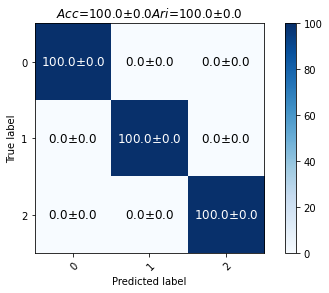

In [0]:
plot_confusion_matrix_MS(np.mean(cmc_sc,axis=0), np.std(cmc_sc,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_sc),'.1f') +'$\pm$'+ format(np.std(acc_sc),'.1f')+'${ Ari}$='+ format(np.mean(ari_sc),'.1f') +'$\pm$'+ format(np.std(ari_sc),'.1f'))
print(best_parameters_sc[0])

{'rep__n_clusters_': 3, 'rep__nn': 5}


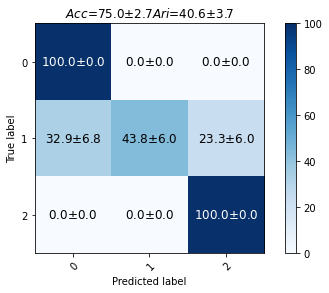

In [0]:
plot_confusion_matrix_MS(np.mean(cmc_knn,axis=0), np.std(cmc_knn,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_knn),'.1f') +'$\pm$'+ format(np.std(acc_knn),'.1f')+'${Ari}$='+ format(np.mean(ari_knn),'.1f') +'$\pm$'+ format(np.std(ari_knn),'.1f'))
print(best_parameters_knn[0])

{'rep__lambda_': 15, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 4}


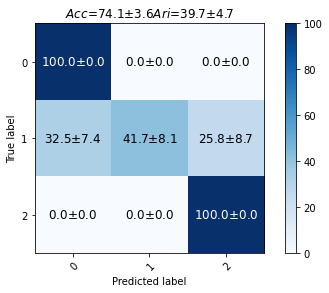

In [0]:

plot_confusion_matrix_MS(np.mean(cmc_fp,axis=0), np.std(cmc_fp,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_fp),'.1f') +'$\pm$'+ format(np.std(acc_fp),'.1f')+'${Ari}$='+ format(np.mean(ari_fp),'.1f') +'$\pm$'+ format(np.std(ari_fp),'.1f'))
print(best_parameters_fp[0])

{'rep__lambda_': 15, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__prediction': 'Div', 'rep__reduction_': True, 'rep__sigma_initial': 40}


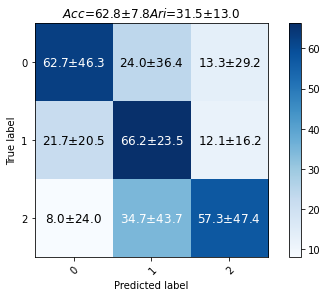

In [0]:
plot_confusion_matrix_MS(np.mean(cmc_sgd,axis=0), np.std(cmc_sgd,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_sgd),'.1f') +'$\pm$'+ format(np.std(acc_sgd),'.1f')+'${Ari}$='+ format(np.mean(ari_sgd),'.1f') +'$\pm$'+ format(np.std(ari_sgd),'.1f'))
print(best_parameters_sgd[0])

{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 40}


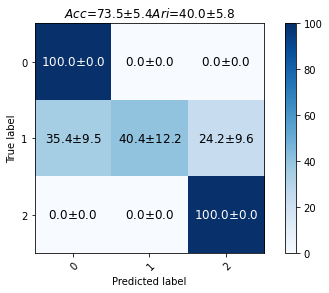

In [0]:
plot_confusion_matrix_MS(np.mean(cmc_sgda,axis=0), np.std(cmc_sgda,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_sgda),'.1f') +'$\pm$'+ format(np.std(acc_sgda),'.1f')+'${Ari}$='+ format(np.mean(ari_sgda),'.1f') +'$\pm$'+ format(np.std(ari_sgda),'.1f'))
print(best_parameters_sgda[0])

{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 9, 'rep__optimization': 'Nadam', 'rep__prediction': 'Div', 'rep__reduction_': True, 'rep__sigma_initial': 25}


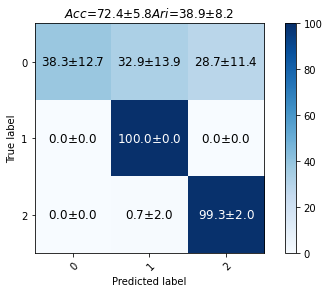

In [0]:
plot_confusion_matrix_MS(np.mean(cmc_sgdn,axis=0), np.std(cmc_sgdn,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_sgdn),'.1f') +'$\pm$'+ format(np.std(acc_sgdn),'.1f')+'${Ari}$='+ format(np.mean(ari_sgdn),'.1f') +'$\pm$'+ format(np.std(ari_sgdn),'.1f'))
print(best_parameters_sgdn[0])

**Moons**

**Accuracy**

In [0]:
#cargar resultados y graficar promedios por iteraciones
## SC
SC = load('/content/PRI/moonssc.joblib')
acc_sc = SC['acc']
cmc_sc = SC['confusionmatrix']
best_estimators_sc = SC['best_models']
best_parameters_sc = SC['best_parameters']
## Kmean
Knn = load('/content/PRI/moonsKnn.joblib')
acc_knn = Knn['acc']
cmc_knn = Knn['confusionmatrix']
best_estimators_knn = Knn['best_models']
best_parameters_knn = Knn['best_parameters']
## FP
FP = load('/content/PRI/moonsFP.joblib')
acc_fp = FP['acc']
cmc_fp = FP['confusionmatrix']
best_estimators_fp = FP['best_models']
best_parameters_fp = FP['best_parameters']
## Mini lotes
SGD = load('/content/PRI/moonsSGD.joblib')
acc_sgd = SGD['acc']
cmc_sgd = SGD['confusionmatrix']
best_estimators_sgd = SGD['best_models']
best_parameters_sgd = SGD['best_parameters']
## Adam
SGDA = load('/content/PRI/moonsSGDA.joblib')
acc_sgda = SGDA['acc']
cmc_sgda = SGDA['confusionmatrix']
best_estimators_sgda = SGDA['best_models']
best_parameters_sgda = SGDA['best_parameters']
## Nadam
SGDN = load('/content/PRI/moonsSGDN.joblib')
acc_sgdn = SGDN['acc']
cmc_sgdn = SGDN['confusionmatrix']
best_estimators_sgdn = SGDN['best_models']
best_parameters_sgdn = SGDN['best_parameters']

{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}


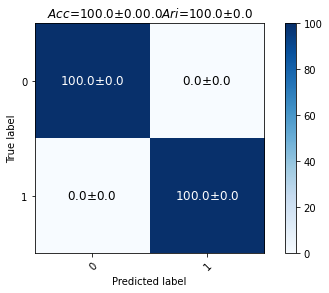

In [0]:
plot_confusion_matrix_MS(np.mean(cmc_sc,axis=0), np.std(cmc_sc,axis=0), np.unique(labels_moons))
plt.title('${Acc}$='+ format(np.mean(acc_sc),'.1f') +'$\pm$'+ format(np.std(acc_sc),'.1f')+ format(np.std(acc_sc),'.1f')+'${Ari}$='+ format(np.mean(ari_sc),'.1f') +'$\pm$'+ format(np.std(ari_sc),'.1f'))
print(best_parameters_sc[0])

{'rep__n_clusters_': 3, 'rep__nn': 5}


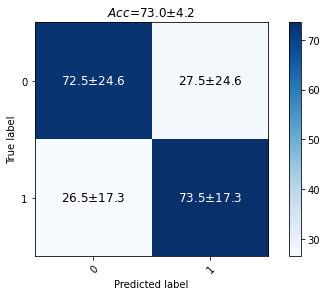

In [0]:
plot_confusion_matrix_MS(np.mean(cmc_knn,axis=0), np.std(cmc_knn,axis=0), np.unique(labels_moons))
plt.title('${Acc}$='+ format(np.mean(acc_knn),'.1f') +'$\pm$'+ format(np.std(acc_knn),'.1f')+ format(np.std(acc_knn),'.1f')+'${Ari}$='+ format(np.mean(ari_knn),'.1f') +'$\pm$'+ format(np.std(ari_knn),'.1f'))
print(best_parameters_knn[0])

{'rep__lambda_': 15, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__prediction': 'Div', 'rep__reduction_': True, 'rep__sigma_initial': 25}


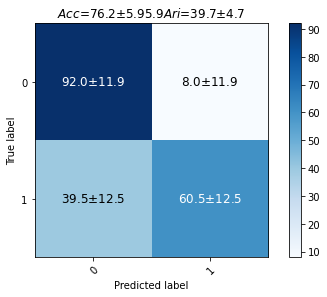

In [0]:
plot_confusion_matrix_MS(np.mean(cmc_fp,axis=0), np.std(cmc_fp,axis=0), np.unique(labels_moons))
plt.title('${Acc}$='+ format(np.mean(acc_fp),'.1f') +'$\pm$'+ format(np.std(acc_fp),'.1f')+ format(np.std(acc_fp),'.1f')+'${Ari}$='+ format(np.mean(ari_fp),'.1f') +'$\pm$'+ format(np.std(ari_fp),'.1f'))
print(best_parameters_fp[0])

{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}


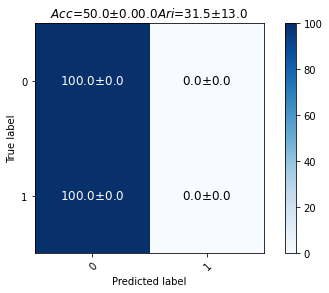

In [0]:
plot_confusion_matrix_MS(np.mean(cmc_sgd,axis=0), np.std(cmc_sgd,axis=0), np.unique(labels_moons))
plt.title('${Acc}$='+ format(np.mean(acc_sgd),'.1f') +'$\pm$'+ format(np.std(acc_sgd),'.1f')+ format(np.std(acc_sgd),'.1f')+'${Ari}$='+ format(np.mean(ari_sgd),'.1f') +'$\pm$'+ format(np.std(ari_sgd),'.1f'))
print(best_parameters_sgd[0])

{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}


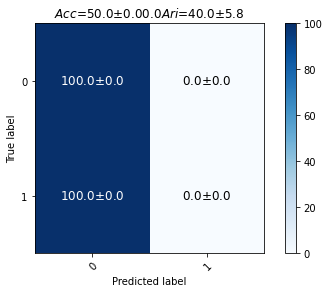

In [0]:
plot_confusion_matrix_MS(np.mean(cmc_sgda,axis=0), np.std(cmc_sgda,axis=0), np.unique(labels_moons))
plt.title('${Acc}$='+ format(np.mean(acc_sgda),'.1f') +'$\pm$'+ format(np.std(acc_sgda),'.1f')+ format(np.std(acc_sgda),'.1f')+'${Ari}$='+ format(np.mean(ari_sgda),'.1f') +'$\pm$'+ format(np.std(ari_sgda),'.1f'))
print(best_parameters_sgda[0])

{'rep__lambda_': 5, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Nadam', 'rep__prediction': 'Gaussian', 'rep__reduction_': True, 'rep__sigma_initial': 10}


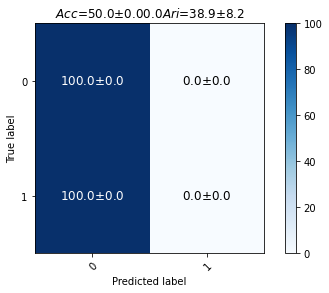

In [0]:
plot_confusion_matrix_MS(np.mean(cmc_sgdn,axis=0), np.std(cmc_sgdn,axis=0), np.unique(labels_moons))
plt.title('${Acc}$='+ format(np.mean(acc_sgdn),'.1f') +'$\pm$'+ format(np.std(acc_sgdn),'.1f')+ format(np.std(acc_sgdn),'.1f')+'${Ari}$='+ format(np.mean(ari_sgdn),'.1f') +'$\pm$'+ format(np.std(ari_sgdn),'.1f'))
print(best_parameters_sgdn[0])

**Parte 2**

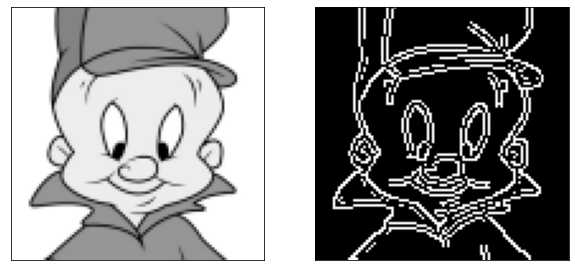

In [0]:
img = cv2.imread('/content/PRI/image.PNG', 0)
edges = cv2.Canny(img, 100, 255)
indices = np.where(edges != [0])
coordinates = zip(indices[0], indices[1])
indices=np.asarray(indices).T
indices=np.flip(indices)
indices[:,1]=abs(indices[:,1]-np.amax(indices))
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(122)
plt.imshow(edges, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

**Punto Fijo**

el tiempo requerido fue:69.46774697303772sg


/content/PRI/main_functions.py:198: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


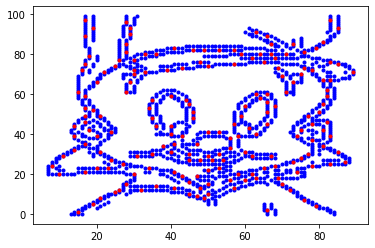

In [0]:
# ss= reducir el tamaño de muestras originales N veces 
# PC= criterio de paciencia
t = time.time()
p = PRI(n_groups=3, lambda_=15, sigma_initial=2, method='FP',
        reduction_ = False, max_iter=600,PC=400,ss=8)
p.fit(indices)
print('el tiempo requerido fue:' + str(time.time() - t) + 'sg')
plt.plot(indices[:,0],indices[:,1],'b.')
plt.plot(p.cluster_centers_[:,0],p.cluster_centers_[:,1],'r.')

**SGD por mini lotes**

el tiempo requerido fue:1.475994348526001sg


/content/PRI/main_functions.py:479: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


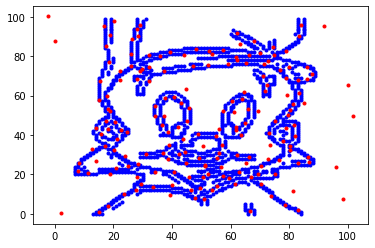

In [0]:

# PC= criterio de paciencia
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=18, sigma_initial=40, method='SGD',
                 reduction_ = False,PC=500,lr=1.1,decay=0.00001,ss=8)
p.fit(indices)
print('el tiempo requerido fue:' + str(time.time() - t) + 'sg')
plt.plot(indices[:,0],indices[:,1],'b.')
plt.plot(p.cluster_centers_[:,0],p.cluster_centers_[:,1],'r.')

**Adam**

/content/PRI/main_functions.py:479: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


el tiempo requerido fue:1.4350457191467285sg


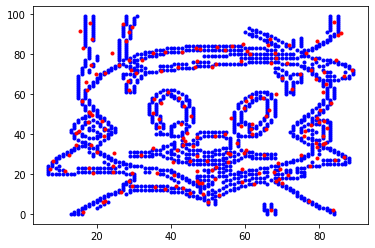

In [0]:
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=18, sigma_initial=40, method='SGD', optimization='Adam',
                 reduction_ = False, PC=500,lr=0.2, decay=0.00001,ss=8)
p.fit(indices)

print('el tiempo requerido fue:' + str(time.time() - t) + 'sg')
plt.plot(indices[:,0],indices[:,1],'b.')
plt.plot(p.cluster_centers_[:,0],p.cluster_centers_[:,1],'r.')


**NAdam**

el tiempo requerido fue:1.4678702354431152sg


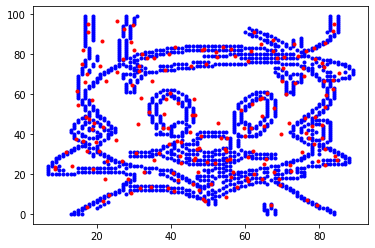

In [0]:
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=18, sigma_initial=50, method='SGD', optimization='Nadam',
                 reduction_ = False, PC=500,lr=0.1, decay=0.00001,ss=8)
p.fit(indices)
print('el tiempo requerido fue:' + str(time.time() - t) + 'sg')
plt.plot(indices[:,0],indices[:,1],'b.')
plt.plot(p.cluster_centers_[:,0],p.cluster_centers_[:,1],'r.')

**Guardar resultados**

In [0]:

import shutil
from joblib import dump, load
from datetime import date, datetime
save={'i':indices}
dump(save,'/content/PRI/DB2.joblib')
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'indices'
shutil.make_archive(namefile, 'zip', '/content/PRI')
files.download(namefile+'.zip')